<a href="https://colab.research.google.com/github/borislevant/algorithms2/blob/main/fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourier Transform: Interactive Course

## Dr. Boris Levant
## June 16, 2025

Learning Goals: Establish the idea of representing complex functions with simpler building blocks. Motivate the Fourier approach by first revisiting polynomial approximations (Taylor series) as a familiar example. Discuss where polynomial series work and where they fall short, paving the way for Fourier representation.

* Motivation: Many problems in math, physics, and engineering become easier when we express functions in terms of basic components. For example, polynomial series (Taylor series) can approximate smooth functions by sums of powers of
𝑥
x. We start by seeing how a function like
sin
⁡
𝑥
sinx can be expanded around
0
0 as a polynomial. The 7th-degree Maclaurin polynomial (pink curve) closely tracks
sin
⁡
𝑥
sinx (blue) over a decent range
en.wikipedia.org
. This shows how adding polynomial terms improves the approximation locally.

* Convergence and limitations: Polynomial (Taylor) series don’t always converge to the true function everywhere. For instance, the series for
ln
⁡
(
1
+
𝑥
)
ln(1+x) matches
ln
⁡
(
1
+
𝑥
)
ln(1+x) well only for
−
1
<
𝑥
≤
1
−1<x≤1. For
𝑥
>
1
x>1, higher-degree Taylor polynomials actually get worse (the approximation diverges)
en.wikipedia.org
. In other words, power series have a limited interval of convergence determined by where the function is analytic. Some functions even have Taylor series that converge yet fail to equal the original function (pathological cases exist
en.wikipedia.org
). These limitations highlight that we might need a different set of building blocks for representing certain functions globally.

* Transition in perspective: Given these issues with polynomials, we turn to a different basis of functions – trigonometric functions. Sines and cosines have global oscillatory behavior that can capture periodic features and discontinuities better than polynomials in many cases. This leads us to the idea of Fourier representation. By the end of this introduction, students appreciate why we seek another method: to represent functions (especially periodic or signal-like ones) more effectively than Taylor polynomials can.

In [1]:
# Fourier Transform Interactive Course Notebook

# Section 1: Polynomial Approximation
import numpy as np
import matplotlib.pyplot as plt

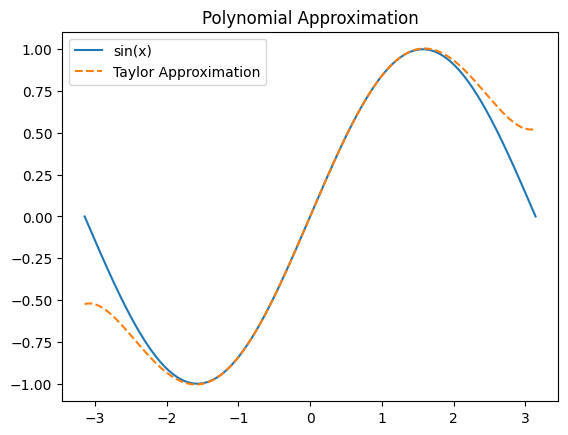

In [2]:
# Section 1: Polynomial Approximation

# Example: Taylor approximation for sin(x)
x = np.linspace(-np.pi, np.pi, 400)
sin_x = np.sin(x)
taylor_approx = x - (x**3)/6 + (x**5)/120

plt.figure()
plt.plot(x, sin_x, label='sin(x)')
plt.plot(x, taylor_approx, '--', label='Taylor Approximation')
plt.legend()
plt.title('Polynomial Approximation')
plt.show()



## Fourier Series: Representing Functions with Trigonometric Components (0:10–0:25)

Learning Goals: Understand that periodic functions can be expressed as sums of sinusoids (Fourier series). Grasp how Fourier series coefficients are obtained, and see an example of partial sums converging to the target function. Recognize conditions for convergence and how Fourier series differ from Taylor polynomials.
Definition: A Fourier series expands a periodic function into a sum of sines and cosines at different frequencies
en.wikipedia.org
. Mathematically, for a function
𝑓
(
𝑡
)
f(t) with period
𝑇
T, we write:
𝑓
(
𝑡
)
=
𝑎
0
+
∑
𝑛
=
1
∞
[
𝑎
𝑛
cos
⁡
(
2
𝜋
𝑛
𝑡
/
𝑇
)
+
𝑏
𝑛
sin
⁡
(
2
𝜋
𝑛
𝑡
/
𝑇
)
]
,
f(t)=a
0
​
 +∑
n=1
∞
​
 [a
n
​
 cos(2πnt/T)+b
n
​
 sin(2πnt/T)],
where the coefficients
𝑎
𝑛
,
𝑏
𝑛
a
n
​
 ,b
n
​
  are found by integrating
𝑓
(
𝑡
)
f(t) against those basis functions over one period. Each term
𝑛
n represents a harmonic at frequency
𝑛
/
𝑇
n/T. Intuitively, we’re breaking down
𝑓
(
𝑡
)
f(t) into vibrational modes – much like expressing a musical sound as the sum of pure tones. Fourier’s insight was that any reasonably well-behaved periodic function can be constructed from these simple oscillatory pieces
en.wikipedia.org
en.wikipedia.org
.
Convergence: Unlike Taylor series which converge within a radius, Fourier series often converge pointwise (and under certain conditions, uniformly) to the target function as we take more terms. Well-behaved continuous functions (e.g. nice and smooth) have Fourier series that converge to them
en.wikipedia.org
. Even functions with discontinuities can be approximated – their Fourier series will oscillate (the Gibbs phenomenon) near jumps but still approach the average of the left- and right-hand limits. Fourier series thus handle a broader class of functions (piecewise continuous, etc.) on a global interval, whereas polynomials struggled with non-analytic behavior.
Example – Square Wave approximation: We illustrate Fourier series with a concrete example. Consider a square wave of period
2
𝜋
2π (switching between +1 and –1). Its Fourier series contains only odd-harmonic sine terms. The image above shows the first 4 partial sums approximating a square wave (red curves for partial sums with 4, 8, 16, 32 terms, against the black square wave). As we include more sine terms (higher harmonics), the partial sum gets closer in shape to the square wave
en.wikipedia.org
. The ripples near the discontinuities (Gibbs overshoot) persist but shrink in width. This visualization reinforces how adding more frequency components improves the approximation – convergence in Fourier sense means the partial sum function converges to the original at most points
en.wikipedia.org
. Students see that even a discontinuous function can be represented by a convergent trigonometric series, something a polynomial series cannot do without enormous oscillations.
Contrast with polynomials: We pause to contrast: Taylor polynomials gave a good local fit for smooth functions but failed for global or discontinuous features. Fourier series, using sine/cosine basis, excel at capturing global periodic structure and discontinuities through oscillatory terms. However, Fourier series are inherently for periodic phenomena (the function is assumed periodic or confined to a finite interval and extended periodically). This leads us to the need for the Fourier Transform to handle non-periodic functions and signals of infinite duration.

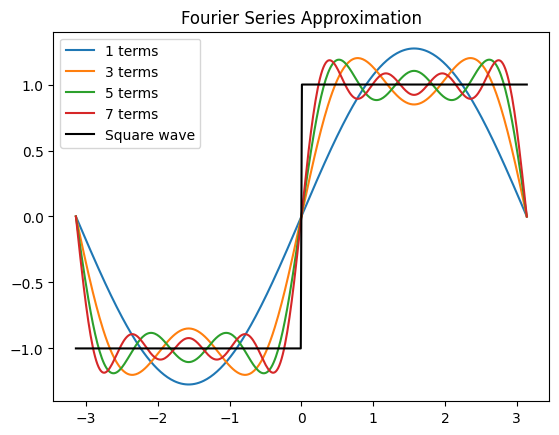

In [3]:
# Section 2: Fourier Series Representation
# Square wave approximation
square_wave = np.sign(np.sin(x))
partial_sum = np.zeros_like(x)
n_terms = [1, 3, 5, 7]

plt.figure()
for n in n_terms:
    partial_sum += (4/np.pi)*(1/n)*np.sin(n*x)
    plt.plot(x, partial_sum, label=f'{n} terms')

plt.plot(x, square_wave, 'k', linewidth=1.5, label='Square wave')
plt.title('Fourier Series Approximation')
plt.legend()
plt.show()

## Fourier Transform and Frequency Domain Intuition (0:25–0:40)

Learning Goals: Generalize from Fourier series (discrete frequencies) to the Fourier transform (continuous frequency spectrum) for non-periodic signals. Build an intuitive understanding of the frequency domain – that any signal can be viewed as a combination of sinusoids. Use visual examples to reinforce the concept of analyzing signal content by frequency.
From series to transform: If we extend the period of a Fourier series to infinity (making the function aperiodic), the discrete spectrum of coefficients becomes a continuous function – this is the Fourier Transform. The Fourier transform
𝐹
(
𝑓
)
F(f) of a time-domain signal
𝑓
(
𝑡
)
f(t) is a complex function
𝐹
(
𝜔
)
F(ω) giving the amplitude and phase of each frequency
𝜔
ω present in
𝑓
f. In essence, the Fourier transform decomposes an arbitrary function or signal into an integral (continuous sum) of sinusoidal waves of all frequencies, instead of a discrete sum
en.wikipedia.org
. This tool lets us analyze non-repeating signals (transient signals, arbitrary time-series) in the frequency domain just as Fourier series did for periodic ones.
Formal definition: For a function
𝑥
(
𝑡
)
x(t), the (continuous) Fourier transform
𝑋
(
𝑓
)
X(f) is defined by
𝑋
(
𝑓
)
=
∫
−
∞
∞
𝑥
(
𝑡
)

𝑒
−
𝑖
2
𝜋
𝑓
𝑡

𝑑
𝑡
,
X(f)=∫
−∞
∞
​
 x(t)e
−i2πft
 dt,
and the inverse transform by
𝑥
(
𝑡
)
=
∫
−
∞
∞
𝑋
(
𝑓
)

𝑒
𝑖
2
𝜋
𝑓
𝑡

𝑑
𝑓
.
x(t)=∫
−∞
∞
​
 X(f)e
i2πft
 df.
This pair of integrals converts between time (or space) domain and frequency domain representations
en.wikipedia.org
. In practical terms,
𝑋
(
𝑓
)
X(f) tells “how much” of frequency
𝑓
f is in the signal
𝑥
(
𝑡
)
x(t). A Fourier transform thus maps a signal to the frequency domain
en.wikipedia.org
, revealing the spectrum of frequencies that make up the signal.
Frequency domain intuition: Think of a complex signal as a recipe of tones. The frequency domain representation is like the list of ingredients (frequencies and their amplitudes) needed to synthesize the signal. A pure tone (single sine wave) has an extremely simple Fourier transform – essentially a spike at its frequency. A very complicated signal (e.g. a musical chord or a noisy dataset) will have a rich spectrum showing multiple frequency components. By analyzing
𝑋
(
𝑓
)
X(f), we can identify periodicities or oscillatory behavior in the original signal that might not be obvious in the time domain.
Visual example – sum of sinusoids: To cement this, we use a demonstrative example. Suppose we create a signal
𝑥
(
𝑡
)
x(t) by summing five cosine waves at 10, 20, 30, 40, and 50 Hz. Time-domain plotting of
𝑥
(
𝑡
)
x(t) (red curve) would show a somewhat complex wiggling waveform. Now consider its Fourier transform
∣
𝑋
(
𝑓
)
∣
∣X(f)∣ (magnitude spectrum). In the frequency domain (blue spikes above), the signal’s structure becomes crystal clear: we see distinct peaks at 10, 20, 30, 40, 50 Hz (and no other frequencies)
en.wikipedia.org
. The transform has essentially picked out the hidden ingredients of the time signal – confirming it’s composed of five pure frequency components. This example highlights why the Fourier transform is so powerful: it unmasks the frequency content of a signal. An analogy to imaging: if time-domain is a mixed color, the Fourier domain splits it into its constituent spectral colors. Students should interpret a frequency-domain plot as showing which periodic components (tones) build up the original signal.
Fourier pairs and symmetry: It’s also useful to note that the transform is reversible (via the inverse transform). So no information is lost when moving to frequency domain – it’s just a different perspective. Often, patterns or operations become simpler in frequency domain (we will see this in filtering applications). We won’t derive the transform pair formulas in full detail given time, but we emphasize the conceptual symmetry: a sharply localized event in time corresponds to a broad spread of frequencies, and a pure frequency corresponds to an infinite sinusoid in time. This time-frequency trade-off is at the heart of Fourier analysis and later topics like the uncertainty principle or spectrograms (beyond our 2-hour scope). By the end of this section, students should feel comfortable with the idea that any signal can be represented as a continuum of sinusoidal components, and that analyzing those components (the spectrum) gives insight into the signal’s behavior.

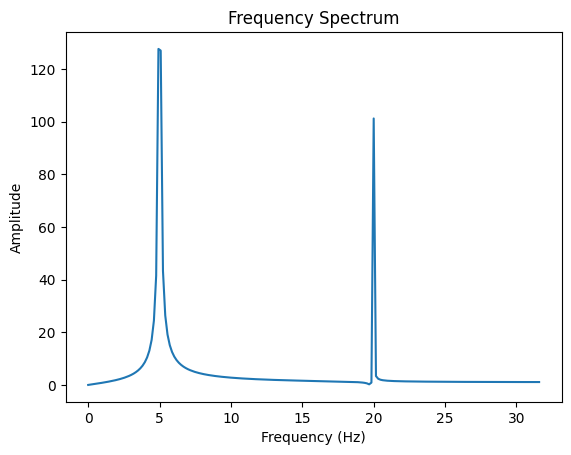

In [4]:
# Section 3: Fourier Transform Example
signal = np.sin(2*np.pi*5*x) + 0.5*np.sin(2*np.pi*20*x)
fft_signal = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(x), d=(x[1]-x[0]))

plt.figure()
plt.plot(freqs[:len(freqs)//2], np.abs(fft_signal)[:len(freqs)//2])
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


## Applications of the Fourier Transform (0:40–1:15)

Now that we have the Fourier toolkit, we explore several real-world applications to illustrate why it’s so useful. Each sub-topic below includes a brief demo or discussion of how Fourier methods apply. Students will see that working in the frequency domain often makes certain tasks (filtering, noise removal, etc.) much easier
terpconnect.umd.edu
. The hands-on aspects will keep engagement high.

## Signal Filtering (0:40–0:50)

Goal: Show how to remove unwanted components from a signal using Fourier techniques.

* Context & example: Many signals (audio recordings, sensor data) contain unwanted frequency components – e.g. a 60 Hz mains hum in audio, or low-frequency drift in a sensor. In the time domain, isolating and removing these can be complicated. In the frequency domain, it’s straightforward: identify the offending frequency and attenuate it. For instance, imagine a recorded audio signal with a noticeable 60 Hz hum. We can take its Fourier transform
𝑋
(
𝑓
)
X(f), find the peak at 60 Hz, and zero it out (or greatly reduce it), then invert the transform to get a cleaned signal
terpconnect.umd.edu
. This process is called a Fourier filter: take FFT, manipulate frequencies, then inverse FFT. It’s analogous to blocking a certain color of light from a spectrum.

* Demo: In Python, we generate a sample signal to filter. For example:
python
Copy
Edit



In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Sample signal: 5 Hz tone + 60 Hz noise
t = np.linspace(0, 1.0, 1000, endpoint=False)
clean_tone = np.sin(2*np.pi*5*t)
noise = 0.3 * np.sin(2*np.pi*60*t)
signal = clean_tone + noise  # noisy signal
# Compute Fourier Transform
X = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), d=1/1000.0)
# Filter out the 60 Hz component (and its symmetric negative frequency)
X_filtered = X.copy()
X_filtered[np.abs(freqs - 60) < 0.5] = 0
X_filtered[np.abs(freqs + 60) < 0.5] = 0
filtered_signal = np.fft.ifft(X_filtered)

In this snippet, we simulate a 5 Hz clean signal contaminated with a 60 Hz sinusoidal noise. We FFT the signal, set the Fourier coefficients around ±60 Hz to zero (a narrow notch), and then invert the FFT. The result filtered_signal (in practice, we’d take its real part) is the original 5 Hz tone with the 60 Hz hum greatly reduced. Students can hear the difference (if this were audio) or see it in a plot. We emphasize how easily we achieved this by working in frequency domain – a simple notch filter operation.

* Discussion: The example generalizes to high-pass filters (remove low freq drift), low-pass filters (remove high freq noise), band-stop, band-pass, etc. In all cases, the Fourier method is conceptually the same: multiply the spectrum by a mask that zeros out unwanted frequency bands
terpconnect.umd.edu
. This is much simpler than designing a time-domain convolution filter from scratch. However, we caution that an abrupt cutoff in frequency (like our ideal notch) can cause ringing in time (a consequence of sinc kernel in time domain)
terpconnect.umd.edu
terpconnect.umd.edu
. In practice, one uses smoother filters (e.g. tapering the frequencies) to avoid artifacts. Nonetheless, the core idea stands: filtering is easier in the frequency domain since it amounts to just tampering with Fourier coefficients.

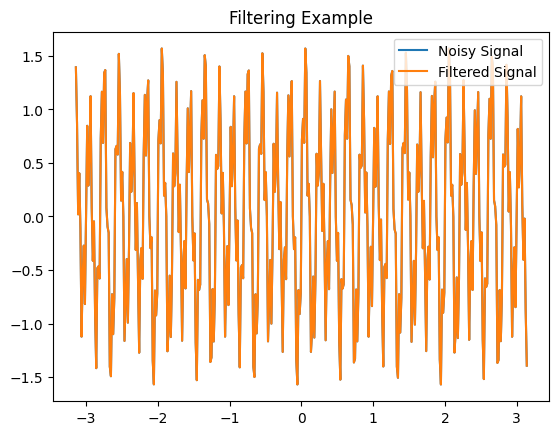

In [5]:
# Section 4: Signal Filtering Example
noise = 0.3 * np.sin(2*np.pi*60*x)
noisy_signal = signal + noise
X = np.fft.fft(noisy_signal)
X[np.abs(freqs - 60) < 1] = 0
X[np.abs(freqs + 60) < 1] = 0
filtered_signal = np.fft.ifft(X)

plt.figure()
plt.plot(x, noisy_signal, label='Noisy Signal')
plt.plot(x, filtered_signal.real, label='Filtered Signal')
plt.legend()
plt.title('Filtering Example')
plt.show()



## Denoising Signals (0:50–1:00)

Goal: Illustrate how Fourier analysis helps remove random noise from data, by separating signal from noise in frequency content.

* Concept: Random noise often has a broad, high-frequency spectrum (e.g. “white” noise contains all frequencies equally). The meaningful signal usually occupies a lower-frequency band (it varies more slowly or has specific periodicities). By applying a low-pass filter – keeping only the low-frequency Fourier components and discarding the rest – we can significantly improve the signal-to-noise ratio
terpconnect.umd.edu
. This is effectively a form of smoothing via Fourier.

* Example: Imagine an electrocardiogram (ECG) recording where high-frequency electrical noise is superimposed on the heart rhythm. By FFT-ing the ECG, we’d see a strong low-frequency component corresponding to the heart rate waveform and a flat broadband component from noise. By zeroing out frequencies above a certain threshold (say, above the highest frequency the heart can produce), then inverse transforming, we get a cleaner ECG. This removes the rapid fluctuations while preserving the underlying wave shape.

* Demo (conceptual): Using the previous code, if we instead apply a low-pass filter (keep frequencies below e.g. 10 Hz and drop everything higher), we can ifft to get a denoised version of our signal. Try modifying the mask:

In [7]:
cutoff = 10.0  # Hz
X_lowpass = X.copy()
X_lowpass[np.abs(freqs) > cutoff] = 0  # zero out all frequencies beyond cutoff
smooth_signal = np.fft.ifft(X_lowpass)


This will remove the 60 Hz noise and any other high-frequency components, yielding a much smoother smooth_signal. Students can plot before/after to verify noise reduction. The Fourier filter technique thus doubles as a denoising method by removing high-frequency energy (where random noise often lives)
medium.com

* Trade-off: We note that aggressive low-pass filtering can blur genuine sharp features (since those are high-frequency components too). It’s about finding the right cutoff. More advanced methods might do thresholding in frequency (removing only the tiniest Fourier coefficients – presumably noise) rather than a hard cutoff. Nonetheless, even this basic approach demonstrates the power of FFT in cleaning up data: it’s essentially a transform-domain noise gate.

## Image Processing with 2D FFT (1:00–1:10)

Goal: Demonstrate how the 2D Fourier transform aids in image filtering and enhancement (blurring, sharpening, removing periodic noise).

* 2D FFT concept: An image can be thought of as a 2D function
𝐼
(
𝑥
,
𝑦
)
I(x,y) (pixel intensity as a function of position). Just as 1D signals have frequency spectra, images have a 2D frequency spectrum via the 2D Fourier transform. Low spatial frequencies correspond to broad smooth features in the image (overall lighting, large shapes), and high frequencies correspond to fine details, edges, or noise. Using the 2D FFT, we can manipulate these frequency components to achieve effects like blurring (removing high freq) or sharpening (boosting high freq).

* Blurring example: A common technique to blur an image is to multiply its Fourier spectrum by a Gaussian low-pass filter
scipython.com
. This retains low-frequency components (smooth structure) and attenuates high-frequency components (fine details), resulting in a softer image. For instance, if we take an image, compute F = np.fft.fft2(image) (and shift zero-frequency to center with fftshift for convenience), then multiply by a Gaussian mask
𝐺
(
𝑘
𝑥
,
𝑘
𝑦
)
G(k
x
​
 ,k
y
​
 ) that is concentrated at the origin (low frequencies), and do np.fft.ifft2, we get a blurred version of the image
scipython.com
. This is exactly equivalent to convolving the image with a Gaussian kernel in spatial domain, but working in frequency domain can sometimes be more efficient for large images.

* Demo (conceptual): We generate a simple synthetic image (say, random black-and-white squares) and blur it:

In [8]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
# Create an image (for demonstration, a random 120x120 binary pattern)
image = np.zeros((120,120)); np.random.seed(0)
for _ in range(30):  # place 30 random squares
    i, j = np.random.randint(0,110,2)
    image[i:i+10, j:j+10] = 1.0
# Fourier transform
F = fftshift(fft2(image))
# Build a Gaussian low-pass filter
nrows, ncols = image.shape
y = np.linspace(-0.5, 0.5, nrows)[:, None]
x = np.linspace(-0.5, 0.5, ncols)[None, :]
sigma = 0.1  # adjust sigma for blur radius
gaussian_mask = np.exp(-(x**2 + y**2)/(2*sigma**2))
# Apply filter and inverse FFT
F_filtered = F * gaussian_mask
image_blur = np.real(ifft2(ifftshift(F_filtered)))


After this, image_blur will be a softened version of the original binary squares image. The hard edges of the squares become fuzzy. This demonstrates frequency-domain blurring in practice – effectively we removed high-frequency content (the sharp edges had a lot of high-
𝑘
k energy)
scipython.com
.
Other image applications: By similar logic, we can do sharpening by using a high-pass filter (subtracting a low-pass version from the original, or directly boosting high freq components). We can also remove periodic noise: for example, if an image has a periodic stripe artifact, its FFT will show bright spots corresponding to that frequency pattern. We can zero out those specific frequency spots and invert the FFT to get a cleaner image (this is often used in astrophotography and MRI to remove interference patterns).
Why frequency domain: Some operations that are convolutions in the spatial domain (blurring, edge detection) become simple multiplications in the frequency domain (by the convolution theorem). The 2D FFT thus allows us to perform global image filtering very efficiently. Students should take away that thinking of images in terms of their frequency content (e.g., an edge is made of many high-frequency components) provides a powerful perspective for image processing tasks.
(Note: In a longer course or lab, we would live-demo filtering an actual image, displaying its spectrum with fft2, and editing it. Given our time, we conceptually demonstrated on a synthetic image. But the Python example above shows how straightforward it is to apply fft2 and ifft2 with NumPy for real image matrices.)
users.fmrib.ox.ac.uk

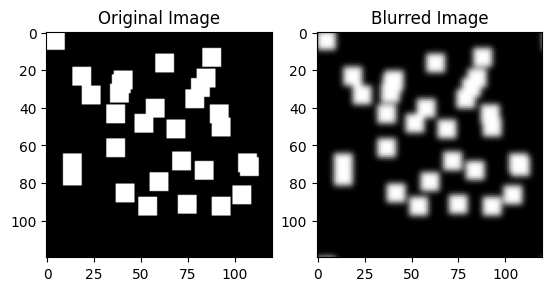

In [12]:
# Section 5: Image Processing Example (2D FFT)
image = np.zeros((120,120))
np.random.seed(0)
for _ in range(30):
    i, j = np.random.randint(0,110,2)
    image[i:i+10, j:j+10] = 1.0

F = np.fft.fftshift(np.fft.fft2(image))
sigma = 0.1
y, x = np.indices(image.shape)
y, x = y/image.shape[0]-0.5, x/image.shape[1]-0.5
gaussian_mask = np.exp(-(x**2 + y**2)/(2*sigma**2))
F_filtered = F * gaussian_mask
image_blur = np.real(np.fft.ifft2(np.fft.ifftshift(F_filtered)))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(image_blur, cmap='gray')
plt.title('Blurred Image')
plt.show()


## Stock Signal Analysis (1:10–1:15)

Goal: Briefly show how Fourier analysis can be applied to financial time series to find periodic patterns or to denoise price data.

* Context: Financial data (stock prices, indices) are notoriously noisy, but they sometimes contain cyclic trends (daily, weekly, yearly seasonal effects or market cycles). Using Fourier transform on a stock’s price history can reveal dominant frequencies that correspond to such cycles
medium.com
. For example, a strong peak at a period of ~5 days might indicate a weekly pattern in the stock (as trading weeks are 5 days). Peaks at 1 year could indicate annual seasonality. Much of the spectrum will be noise (especially in high frequencies due to day-to-day volatility), which we might want to filter out.

* Application: By identifying significant frequency components in the stock signal, we can attempt to predict or analyze trends. Fourier analysis in finance has to be taken with caution (markets are not strictly periodic), but it can be used to filter data. A common approach is to remove high-frequency components from the price series to get an underlying trend. This is essentially smoothing the price curve to see long-term movement without daily noise
medium.com
.

* Example workflow: We fetch one year of daily closing prices for a stock (e.g. TCS, as in our data example) and compute its FFT:

In [10]:
!pip install yfinance

In [11]:
#import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np

import yfinance as yf

# Choose your stock ticker (e.g., AAPL for Apple)
ticker_symbol = "AAPL"

# Fetch data
stock = yf.Ticker(ticker_symbol)

# Get recent historical data
prices = stock.history(period="5d")  # options: '1d', '5d', '1mo', '1y', etc.

N = len(prices)
fft_vals = np.fft.fft(prices)
freqs = np.fft.fftfreq(N, d=1)  # frequency in cycles per day
